# End to End multi class dog Breed Classification
 This notebook builds an end to end multi class image classifier using Tensorflow 2.0 and Tensor Flow hub.

 ## 1. Problem

 ## 2. Dataset
 The data we're using is from "https://www.kaggle.com/c/dog-breed-identification/data"

## 3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image.

## 4. Features
Some information about the Data
* We are dealing with images (unstructured Data) so it's probably best we use deep learning/ transfer learning.
* There are 120 breeds of dogs (meaning 120 different classes) .
* There are 10k+ images in training
(these images have labels) and testing set (these images have no labels, because we will want to predict them)


In [3]:
import tensorflow as tf
print("TF version:",tf.__version__)
print("GPU","Available(yesss!!!!)" if tf.config.list_physical_devices("GPU") else "not available:")

TF version: 2.10.0
GPU Available(yesss!!!!)


In [4]:
import tensorflow_hub as hub
print("Hub version:",hub.__version__)
# Check for GPU availability
print("GPU","Available(yesss!!!!)" if tf.config.list_physical_devices("GPU") else "not available:")

Hub version: 0.16.1
GPU Available(yesss!!!!)


### Works only in in colab

In [5]:
# iMPORT tensor flow 2.0x
# try:
#   %tensorflow_version 2.x
# except:
#   pass

## Getting data into tensors

In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
labels_csv=pd.read_csv("Dog_Vision/labels.csv");
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [9]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [10]:
# How much image are there for each brees
labels_csv["breed"].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

<Axes: xlabel='breed'>

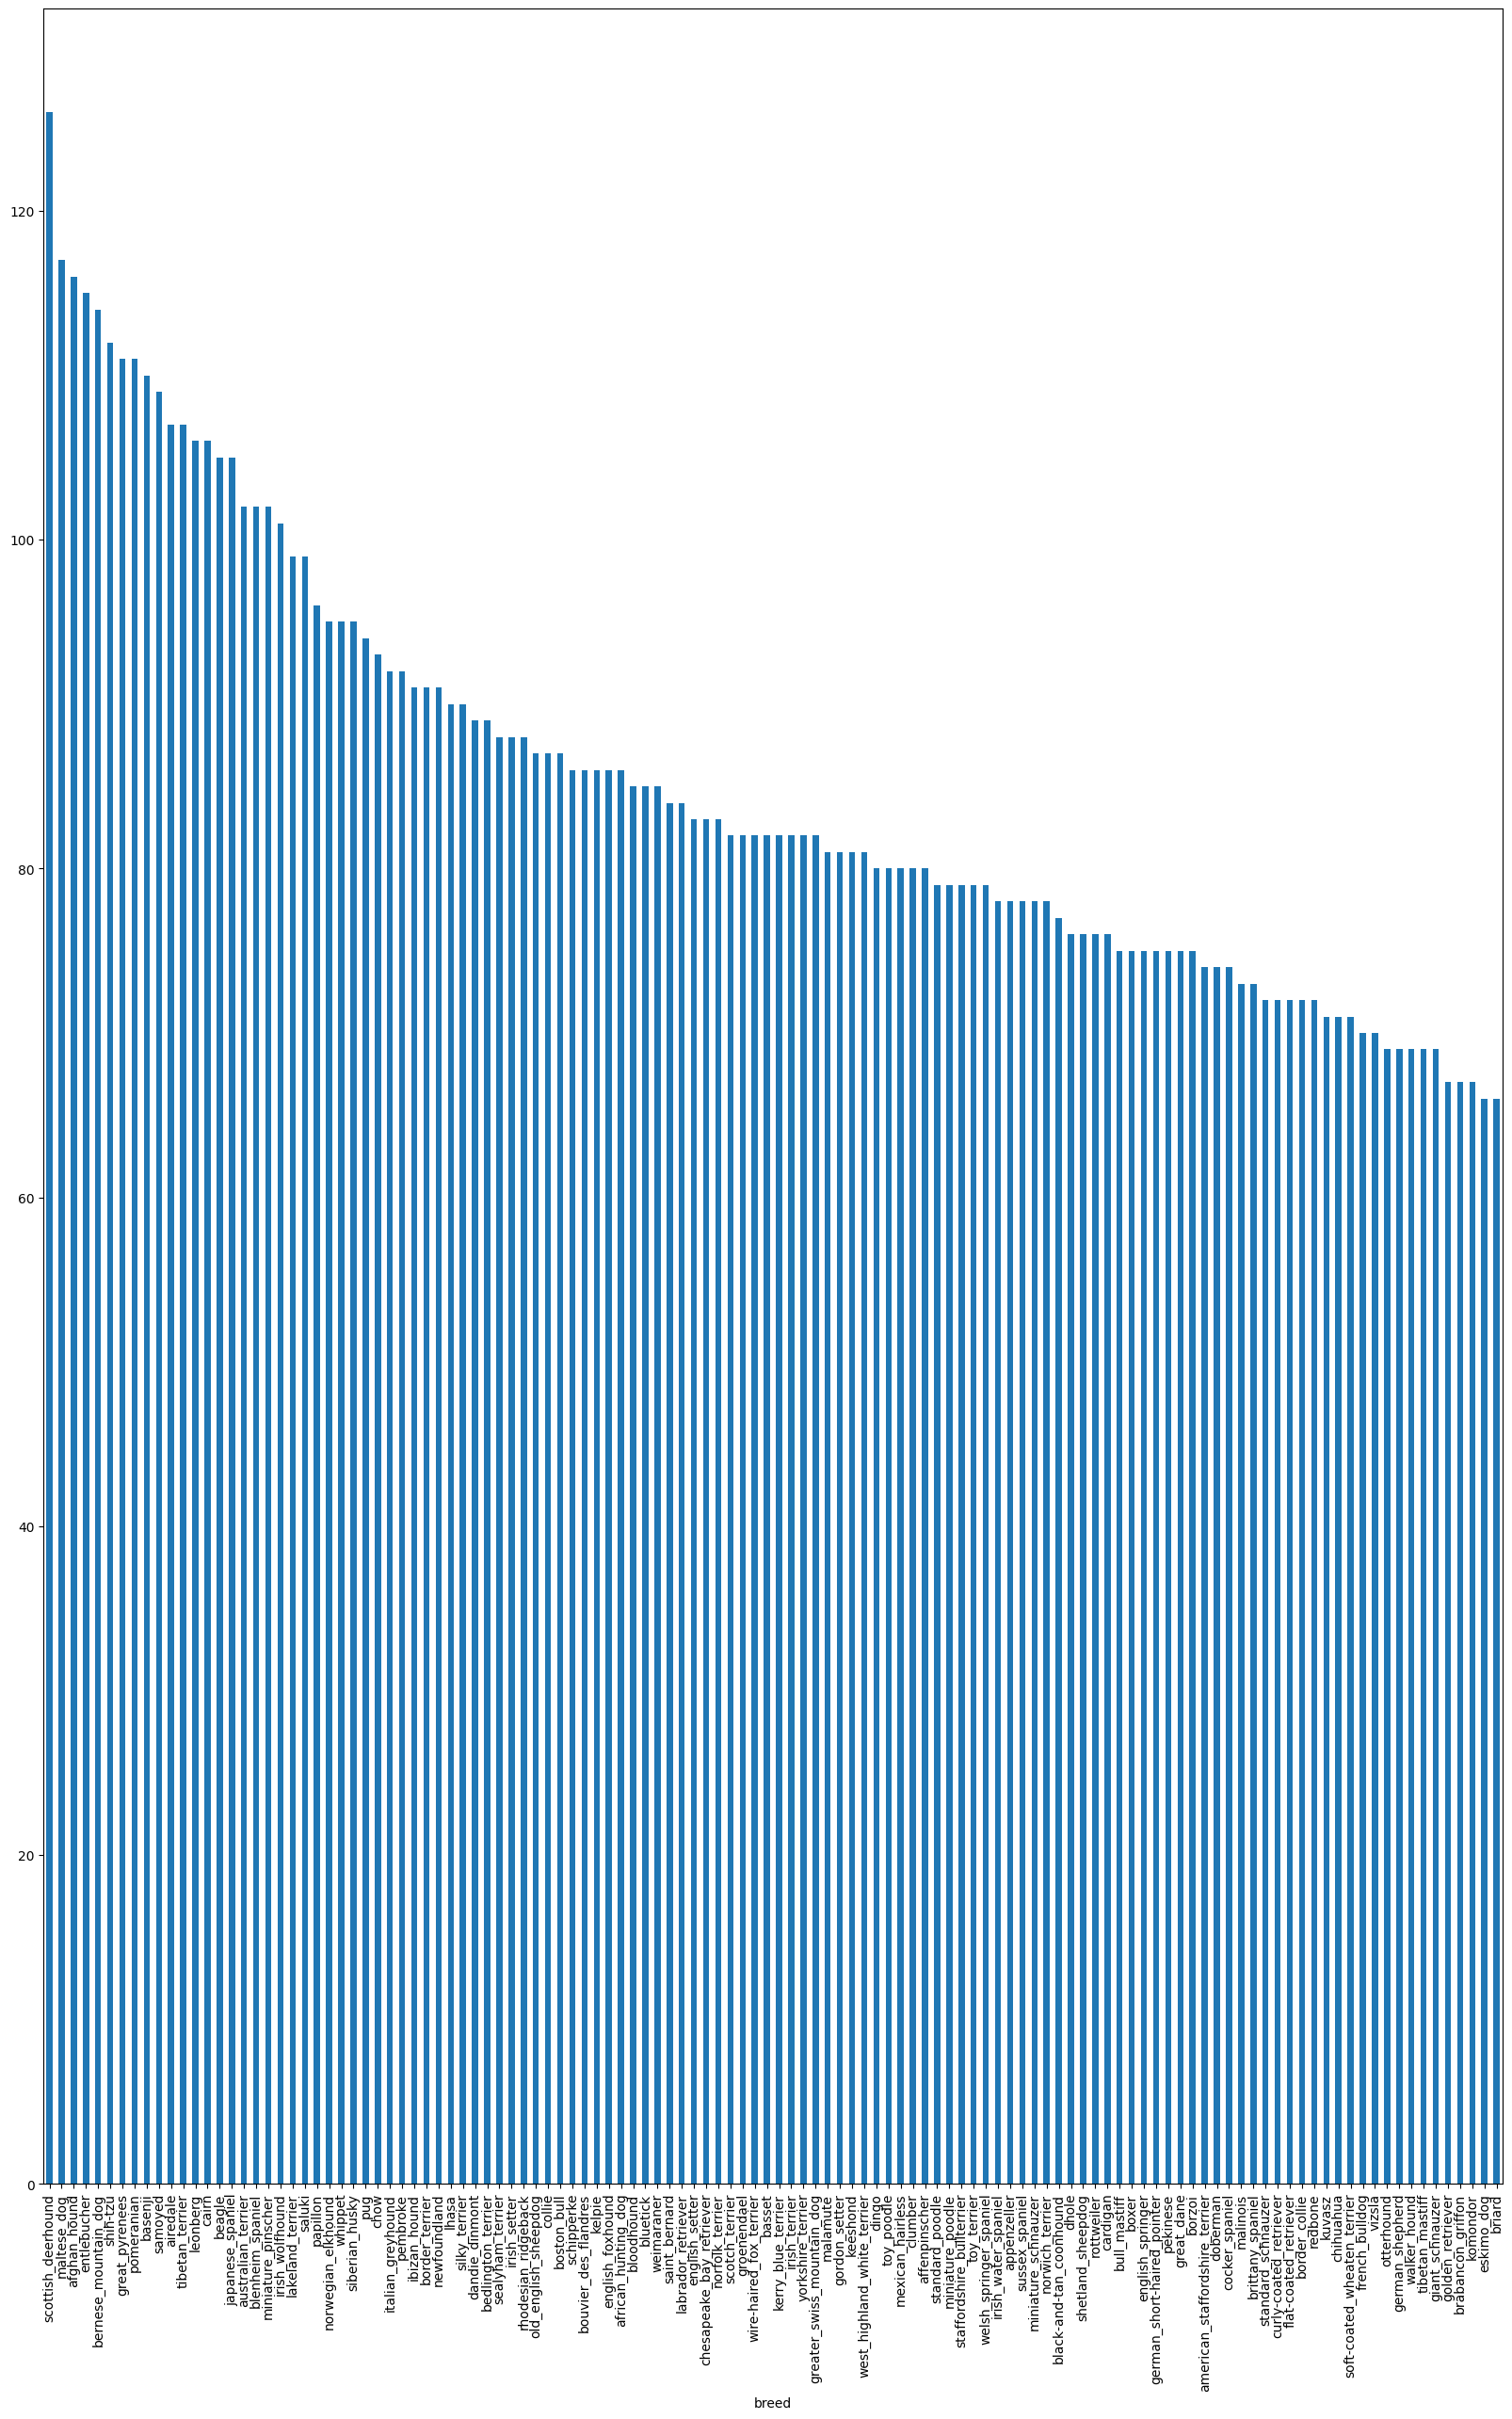

In [11]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,30))

In [12]:
# Viewing an image
from IPython.display import Image

In [13]:
import os
cwd = os.getcwd()
print(cwd)

D:\Conda_Pro_\TensorFLow


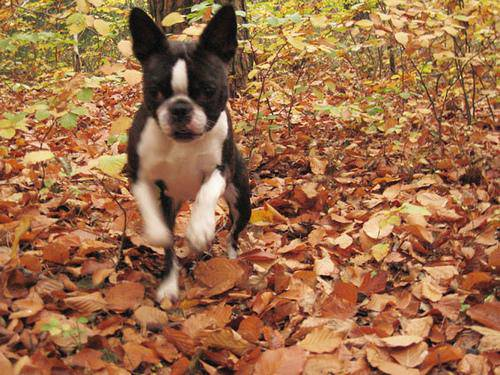

In [14]:
Image("Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

## Getting images and their labels

In [15]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [16]:
#creating pathnames from Image ID's
filenames=["Dog_Vision/train/"+fname +".jpg" for fname in labels_csv["id"]]
filenames[:5]

['Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'Dog_Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'Dog_Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'Dog_Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'Dog_Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [17]:
# Checking whether number of filename matches number of actual image files
if len(os.listdir("Dog_Vision/train/"))== len(filenames):
    print("FIlename match the actual amount of files!!! Proceed.")
else:
    print("FIlenames do not match the actual amount of files, check the target directory.")

FIlename match the actual amount of files!!! Proceed.


In [18]:
import numpy as np

In [19]:
labels=labels_csv["breed"]
labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [20]:
len(labels)

10222

In [21]:
#Finding unique label values
unique_breeds=np.unique(labels)
len(unique_breeds)

120

In [22]:
#turning a single label into an array of booleans
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [23]:
#turning every label into a boolean array
boolean_labels=[label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [24]:
len(boolean_labels)

10222

In [25]:
# turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds==labels[0])) #index where label occurs
print(boolean_labels[0].argmax())#index where label occurs in boolean array
print(boolean_labels[0].astype(int))#there will be a 1 where the sample label occurs


boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [26]:
# Creating our own validation set
X=filenames
y=boolean_labels

In [27]:
# We're going to start off experimenting with ~ 1000 images
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}


In [28]:
import ipywidgets as widgets
from IPython.display import display

NUM_IMAGES = widgets.IntSlider(
    value=1000,
    min=1000,
    max=10000,
    step=1000,
    description='NUM_IMAGES:',
    continuous_update=False
)

display(NUM_IMAGES)


IntSlider(value=1000, continuous_update=False, description='NUM_IMAGES:', max=10000, min=1000, step=1000)

In [29]:
from sklearn.model_selection import train_test_split
#split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.2, random_state=42)
len(X_train),len(y_train),len(X_val),len(y_val)

(8177, 8177, 2045, 2045)

## Preprocessing images into tensors
to preprocess our images into tensors we are going to write a function which does a few things:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable `image`
3. Turn our `image` (a jpg) into 
4. Normalize our image (convert color channel values from 0-255 to 0-1)
5. Resize the `image` to be shape of (224,224)
6. Return the modifier `image`

In [44]:
# Convert image to Numpy
from matplotlib.pyplot import imread
image =imread(filenames[5])
image.shape

(375, 500, 3)

In [48]:
IMG_SIZE=224

# Create a function for preprocessing images
def process_image(image_path,img_size=IMG_SIZE):
    """
    Takes an image filepath and turns the image into tensor
    """
    #read in an image file
    image=tf.io.read_file(image_path)
    #turn the jpg image into numerical tensor with 3 color channels(RGB)
    image=tf.image.decode_jpeg(image,channels=3)
    #convert the color chanel values from 0-255 to 0-1 values
    image=tf.image.convert_image_dtype(image,tf.float32)
    #Resize the image to desired value (@24,224)
    image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

    ret

In [46]:
tensor=tf.io.read_file(filenames[26])

In [47]:
tensor=tf.image.decode_jpeg(tensor,channels=3)
print(tensor)

tf.Tensor(
[[[ 59  68  65]
  [ 64  73  70]
  [ 71  80  77]
  ...
  [115 128 108]
  [115 128 108]
  [110 123 103]]

 [[ 65  74  71]
  [ 72  81  78]
  [ 79  88  85]
  ...
  [114 127 107]
  [117 130 110]
  [116 129 109]]

 [[ 68  77  74]
  [ 76  85  82]
  [ 83  92  89]
  ...
  [114 127 107]
  [120 133 113]
  [123 136 116]]

 ...

 [[173 200 155]
  [164 179 136]
  [181 166 133]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[142 159 117]
  [147 154 113]
  [189 174 141]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[167 179 139]
  [167 172 132]
  [204 188 155]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]], shape=(500, 375, 3), dtype=uint8)
